In [226]:
# Assignment 0
# Task 1

In [238]:
# Load packages

import numpy as np
import pandas as pd
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

In [237]:
# Load in data

train_in = pd.read_csv("../data/train_in.csv", header=None)
test_in = pd.read_csv("../data/test_in.csv", header=None)
train_out = pd.read_csv("../data/train_out.csv", header=None)
test_out = pd.read_csv("../data/test_out.csv", header=None)

In [232]:
# Preprocess data

combined = {}
combined_avg = {}

for matrix, digit in zip(train_in.values, train_out.values.ravel()):
    combined.setdefault(digit, []).append(matrix)

for digit in combined.keys():
    average_matrix = np.array(combined[digit]).mean(axis=0)
    df = pd.DataFrame(average_matrix.reshape(16,16))
    combined_avg[int(digit)] = df
combined_avg = dict(sorted(combined_avg.items()))

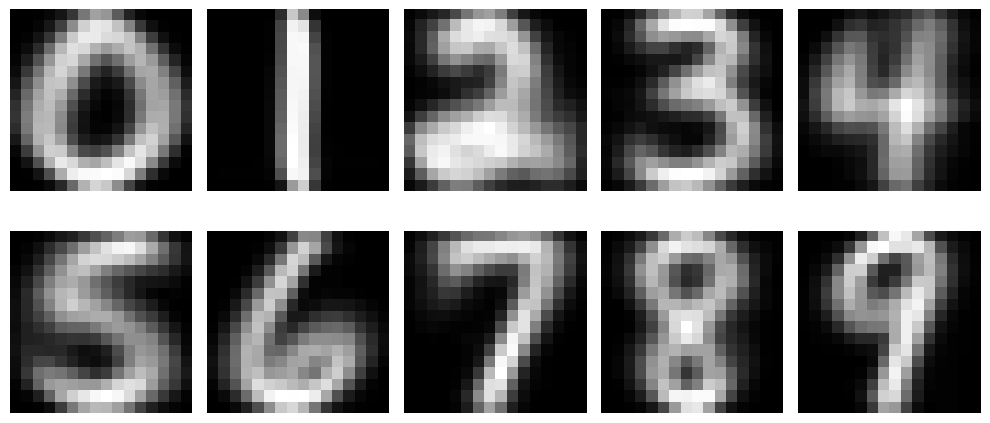

In [233]:
# Visualize average matrix per digit

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.flatten()
for i, img in enumerate(combined_avg.values()):
    axes[i].imshow(img, cmap='gray')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [234]:
# Calculate distances between centers

dist_comp = pd.DataFrame(index=combined_avg.keys(), columns=combined_avg.keys())

for digit1, matrix1 in combined_avg.items():
    for digit2, matrix2 in combined_avg.items():
        dist_comp.at[digit1, digit2] = np.linalg.norm(matrix1 - matrix2)

dist_comp

,0,1,2,3,4,5,6,7,8,9
0,0.0,14.449608,9.334556,9.143734,10.769844,7.519296,8.154443,11.864555,9.907902,11.488875
1,14.449608,0.0,10.125323,11.733233,10.173786,11.1188,10.6147,10.743154,10.086777,9.932094
2,9.334556,10.125323,0.0,8.178285,7.932541,7.906796,7.331808,8.872531,7.077516,8.887748
3,9.143734,11.733233,8.178285,0.0,9.087608,6.11875,9.302065,8.922401,7.020425,8.35435
4,10.769844,10.173786,7.932541,9.087608,0.0,8.001517,8.782233,7.583012,7.380909,6.010408
5,7.519296,11.1188,7.906796,6.11875,8.001517,0.0,6.698692,9.211954,6.967386,8.258538
6,8.154443,10.6147,7.331808,9.302065,8.782233,6.698692,0.0,10.888237,8.587222,10.440004
7,11.864555,10.743154,8.872531,8.922401,7.583012,9.211954,10.888237,0.0,8.467785,5.426474
8,9.907902,10.086777,7.077516,7.020425,7.380909,6.967386,8.587222,8.467785,0.0,6.401166
9,11.488875,9.932094,8.887748,8.35435,6.010408,8.258538,10.440004,5.426474,6.401166,0.0


In [235]:
# Which distances are smallest (top 10)
match_dict = dict()

dist_comp[dist_comp == 0.0] = np.nan
matches = dist_comp.idxmin(axis=0)
distances = dist_comp.min(axis=0)
for i, match in enumerate(matches):
    # print(f"{i} - {match}: {distances[i]}")
    match_dict[f"{i} - {match}"] = float(distances[i])


match_dict = dict(sorted(match_dict.items(), key=lambda item: item[1]))
print("The minimum distance between every digit and its closest neighbor")
for a, b in match_dict.items():
    print(a, b)

The minimum distance between every digit and its closest neighbor
7 - 9 5.426474119055888
9 - 7 5.426474119055888
4 - 9 6.0104079308959975
3 - 5 6.118750020921418
5 - 3 6.118750020921418
8 - 9 6.40116586858544
6 - 5 6.698691718889528
2 - 8 7.077516177863561
0 - 5 7.5192962595971835
1 - 9 9.932093699343712


In [236]:
# The numbers that would seem the most difficult to seperate for a machine learning algorithm, would likely be the ones that are the most similar. From the table above we see that the smallest difference in euclidian distance is between numbrers 7 and 9. Therefore, we should expect these digits to be hardest to seperate on average.